In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

Let's explore a bit the dataset

In [2]:
mvp_2022 = pd.read_csv("../Data/Raw/MVP2022.csv", header = 1)
mvp_2022 = mvp_2022.drop(columns = mvp_2022.columns[-1])
mvp_2022["Year"] = 2022
mvp_2022.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Nikola Jokić,26,DEN,65.0,875.0,1000,0.875,74,33.5,...,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296,2022
1,2,Joel Embiid,27,PHI,26.0,706.0,1000,0.706,68,33.8,...,11.7,4.2,1.1,1.5,0.499,0.371,0.814,12.0,0.252,2022
2,3,Giannis Antetokounmpo,27,MIL,9.0,595.0,1000,0.595,67,32.9,...,11.6,5.8,1.1,1.4,0.553,0.293,0.722,12.9,0.281,2022
3,4,Devin Booker,25,PHO,0.0,216.0,1000,0.216,68,34.5,...,5.0,4.8,1.1,0.4,0.466,0.383,0.868,7.6,0.156,2022
4,5,Luka Dončić,22,DAL,0.0,146.0,1000,0.146,65,35.4,...,9.1,8.7,1.2,0.6,0.457,0.353,0.744,7.6,0.159,2022


Now we will create some code to clean all the datasets, save them individually, and also concatenate them in one to save it as well

First we create two empty lists to store keys and values, and an empty dictionary where we will link the previous lists.

Then we do a for loop to create key names and extract the datasets.

In [165]:
df_name = []
df_data = []
mvps = {}

for x in range(10):
    df_name.append("mvp_"+str(2013+x))
    df_data.append(pd.read_csv("../Data/Raw/MVP{}.csv".format(2013+x), header = 1))

Now we link the keys yo the values, and also do another for loop to clean the data:

- Drop a useless column
- Create columns with PTS, AST, TRB, STL and BLK per minute, in order to not give the edge to players with high minutes per game.
- A column with all stats combined per minute.
- Create another column with the year of the MVP to differentiate it with the others once we concatenate them all.

In [167]:
mvps = dict(zip(df_name, df_data))
    
for key, x in zip(mvps, range(10)):
    mvps[key] = mvps[key].drop(columns = mvps[key].columns[-1])
    mvps[key]["PTS/M"] = mvps[key]["PTS"]/mvps[key]["MP"]
    mvps[key]["TRB/M"] = mvps[key]["TRB"]/mvps[key]["MP"]
    mvps[key]["AST/M"] = mvps[key]["AST"]/mvps[key]["MP"]
    mvps[key]["STL/M"] = mvps[key]["STL"]/mvps[key]["MP"]
    mvps[key]["BLK/M"] = mvps[key]["BLK"]/mvps[key]["MP"]
    mvps[key]["Stats/M"] = mvps[key]["PTS/M"]+mvps[key]["TRB/M"]+mvps[key]["AST/M"]+mvps[key]["STL/M"]+mvps[key]["BLK/M"]
    mvps[key]["Year"] = (2013+x)
    mvps[key].to_csv("../Data/Cleaned/CleanMVP{}.csv".format(2013+x))

Now we concatenate all.

In [168]:
data = pd.concat(mvps.values(), ignore_index = True)
data.shape

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,FT%,WS,WS/48,PTS/M,TRB/M,AST/M,STL/M,BLK/M,Stats/M,Year
0,1,LeBron James,28,MIA,120.0,1207.0,1210,0.998,76,37.9,...,0.753,19.3,0.322,0.707124,0.211082,0.192612,0.044855,0.023747,1.179420,2013
1,2,Kevin Durant,24,OKC,0.0,765.0,1210,0.632,81,38.5,...,0.905,18.9,0.291,0.729870,0.205195,0.119481,0.036364,0.033766,1.124675,2013
2,3,Carmelo Anthony,28,NYK,1.0,475.0,1210,0.393,67,37.0,...,0.830,9.5,0.184,0.775676,0.186486,0.070270,0.021622,0.013514,1.067568,2013
3,4,Chris Paul,27,LAC,0.0,289.0,1210,0.239,70,33.4,...,0.885,13.9,0.287,0.505988,0.110778,0.290419,0.071856,0.002994,0.982036,2013
4,5,Kobe Bryant,34,LAL,0.0,184.0,1210,0.152,78,38.6,...,0.839,10.9,0.174,0.707254,0.145078,0.155440,0.036269,0.007772,1.051813,2013


Fill in some missing values.

In [202]:
data.isna().sum()

Rank       0
Player     0
Age        0
Tm         0
First      0
Pts Won    0
Pts Max    0
Share      0
G          0
MP         0
PTS        0
TRB        0
AST        0
STL        0
BLK        0
FG%        0
3P%        1
FT%        0
WS         0
WS/48      0
PTS/M      0
TRB/M      0
AST/M      0
STL/M      0
BLK/M      0
Stats/M    0
Year       0
dtype: int64

In [204]:
data = data.fillna(0)
data.isna().sum()

Rank       0
Player     0
Age        0
Tm         0
First      0
Pts Won    0
Pts Max    0
Share      0
G          0
MP         0
PTS        0
TRB        0
AST        0
STL        0
BLK        0
FG%        0
3P%        0
FT%        0
WS         0
WS/48      0
PTS/M      0
TRB/M      0
AST/M      0
STL/M      0
BLK/M      0
Stats/M    0
Year       0
dtype: int64

Clean some values from the Rank column.

In [170]:
data["Rank"].value_counts()

1      8
10T    8
3      8
4      8
5      8
6      8
2      8
7      7
12T    7
8      6
9      6
10     4
11     4
13T    3
8      2
6      2
11T    2
12     2
9T     2
7T     2
10     2
9      2
7      2
1      2
5      2
4      2
3      2
2      2
8T     2
17     1
14     1
15     1
13     1
11     1
12     1
16     1
Name: Rank, dtype: int64

In [171]:
data["Rank"] = data["Rank"].replace("T",'',regex=True).astype(int)

In [172]:
data["Rank"].value_counts()

10    14
7     11
1     10
12    10
2     10
8     10
9     10
6     10
5     10
4     10
3     10
11     7
13     4
14     1
15     1
16     1
17     1
Name: Rank, dtype: int64

And save the dataset.

In [9]:
# data.to_csv("../Data/Cleaned/CleanMVPs.csv")

In [173]:
data.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,FT%,WS,WS/48,PTS/M,TRB/M,AST/M,STL/M,BLK/M,Stats/M,Year
0,1,LeBron James,28,MIA,120.0,1207.0,1210,0.998,76,37.9,...,0.753,19.3,0.322,0.707124,0.211082,0.192612,0.044855,0.023747,1.179420,2013
1,2,Kevin Durant,24,OKC,0.0,765.0,1210,0.632,81,38.5,...,0.905,18.9,0.291,0.729870,0.205195,0.119481,0.036364,0.033766,1.124675,2013
2,3,Carmelo Anthony,28,NYK,1.0,475.0,1210,0.393,67,37.0,...,0.830,9.5,0.184,0.775676,0.186486,0.070270,0.021622,0.013514,1.067568,2013
3,4,Chris Paul,27,LAC,0.0,289.0,1210,0.239,70,33.4,...,0.885,13.9,0.287,0.505988,0.110778,0.290419,0.071856,0.002994,0.982036,2013
4,5,Kobe Bryant,34,LAL,0.0,184.0,1210,0.152,78,38.6,...,0.839,10.9,0.174,0.707254,0.145078,0.155440,0.036269,0.007772,1.051813,2013


Now we are going to split the dataset into two, one to predict Rank and another to predict Share, we are going to also drop Player, Tm, First, Pts Won, Pts Max and Year, as this are columns that are either not useful or directly correlated to the MVP.

In [216]:
data_rank = data.drop(columns = ["Player", "Tm", "Share", "First", "Pts Won", "Pts Max", "Year"])
data_share = data.drop(columns = ["Player", "Tm", "Rank", "First", "Pts Won", "Pts Max", "Year"])

Now we define a function to get rid of all the columns that don't reach a threshold of correlation with our target column.

In [196]:
def correlation(df, target = -1, threshold=0.75):
    df2 = df.copy()
    corr_matrix = df2.corr().abs()
    for i in range(len(corr_matrix.columns)):
        if (corr_matrix.iloc[i,target] < threshold):
            df2 = df2.drop(columns = corr_matrix.columns[i])
    display(sns.heatmap(df2.corr(), annot=True))
    return df2

<AxesSubplot:>

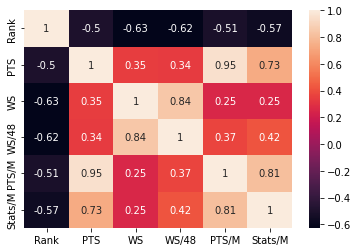

In [217]:
data_rank = correlation(data_rank,0,0.5)

<AxesSubplot:>

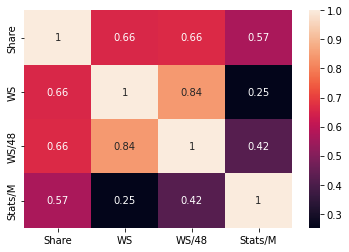

In [218]:
data_share = correlation(data_share,1,0.5)

Well, we are left with very few columns, and the ones we have are highly related to each other in some cases: WS with WS/48, PTS and PTS/M, and PTS/M with Stats/M, which was expected.

We are going to drop WS/48 in both datasets, as well as PTS and PTS/M for the Rank dataset based on multicollinearity.

In [220]:
data_rank = data_rank.drop(columns = ["WS/48", "PTS", "PTS/M"])
data_share = data_share.drop(columns = "WS/48")

Now we can do our X/y splits

In [221]:
rank_X = data_rank.drop(columns = "Rank")
rank_y = data_rank["Rank"]
share_X = data_share.drop(columns = "Share")
share_y = data_share["Share"]

And the Train/Test splits

In [224]:
rank_X_train, rank_X_test, rank_y_train, rank_y_test = train_test_split(rank_X, rank_y, test_size = 0.22, random_state = 22)
share_X_train, share_X_test, share_y_train, share_y_test = train_test_split(share_X, share_y, test_size = 0.22, random_state = 22)